In [15]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [16]:

# Download the resnet-101 layers pre-trained model
#
resnet = models.resnet101(pretrained=True)
#
#
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
#
# Load the image
#
from PIL import Image
img_cat = Image.open('../dataset/Images/n02098413-Lhasa/n02098413_244.jpg').convert('RGB')

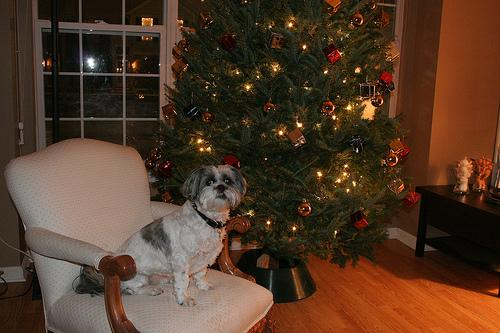

In [18]:
img_cat

In [19]:
from torchvision import transforms
import torch
# Create a preprocessing pipeline
#
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])
#
# Pass the image for preprocessing and the image preprocessed
#
img_cat_preprocessed = preprocess(img_cat)
#
# Reshape, crop, and normalize the input tensor for feeding into network for evaluation
#
batch_img_cat_tensor = torch.unsqueeze(img_cat_preprocessed, 0)


In [20]:
# Resnet is required to be put in evaluation mode in order
# to do prediction / evaluation
#
resnet.eval()
#
# Get the predictions of image as scores related to how the loaded image
# matches with 1000 ImageNet classes. The variable, out is a vector of 1000 scores
#
out = resnet(batch_img_cat_tensor)

In [21]:

# Load the file containing the 1,000 labels for the ImageNet dataset classes
#
with open('./classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
#
# Find the index (tensor) corresponding to the maximum score in the out tensor.
# Torch.max function can be used to find the information
#
_, index = torch.max(out, 1)
#
# Find the score in terms of percentage by using torch.nn.functional.softmax function
# which normalizes the output to range [0,1] and multiplying by 100
#
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
#
# Print the name along with score of the object identified by the model
#
print(labels[index[0]], percentage[index[0]].item())
#
# Print the top 5 scores along with the image label. Sort function is invoked on the torch to sort the scores.
#
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Lhasa, Lhasa apso 77.69580841064453


[('Lhasa, Lhasa apso', 77.69580841064453),
 ('Shih-Tzu', 20.985980987548828),
 ('Tibetan terrier, chrysanthemum dog', 0.7257559895515442),
 ('standard schnauzer', 0.30317261815071106),
 ('affenpinscher, monkey pinscher, monkey dog', 0.1220792755484581)]